In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib import cm
from sklearn.utils import shuffle

# Generate objects and weights

In [2]:
cluster_lengths = np.array([1, 2, 3, 4])*48
dimension = 2

cluster_centers = np.random.random(size=(len(cluster_lengths), dimension))*20 - 10

In [3]:
clusters_objects = [np.random.normal(size=(cluster_lengths[i], dimension)) + 
                    cluster_centers[i].reshape([1, dimension])
                    for i in range(len(cluster_lengths))]
clusters_colors = [cm.Purples, cm.Blues, cm.Greens, cm.Oranges]

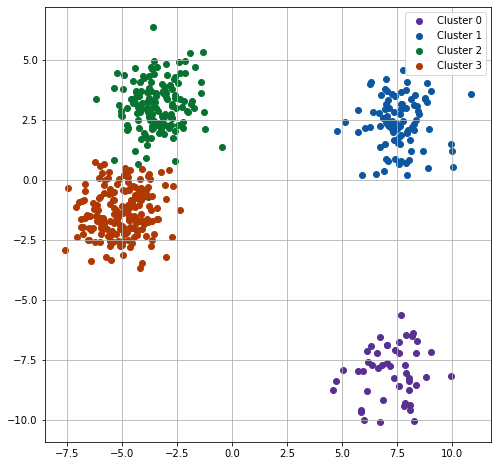

In [4]:
plt.figure(figsize=(8, 8))

for k in range(4):
    x = clusters_objects[k][:, 0]
    y = clusters_objects[k][:, 1]
    plt.scatter(x, y, color=clusters_colors[k](0.85), label='Cluster '+str(k))
plt.grid(True)
plt.legend()
plt.show()

In [5]:
objects = np.concatenate(clusters_objects)
objects_clusters = np.concatenate([i*np.ones(cluster_lengths[i], dtype=int) for i in range(len(cluster_lengths))])

In [6]:
weights = np.random.normal(size=len(objects_clusters))
weights = np.log(12) + np.log(2)*weights
weights = np.exp(weights).astype(int)

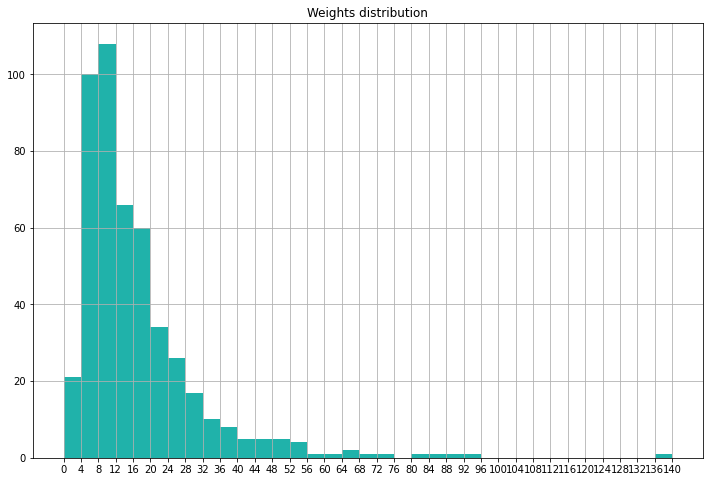

In [7]:
delta = 4
bins = np.arange(0, weights.max()+delta, delta)

plt.figure(figsize=(12, 8))
plt.title('Weights distribution')
plt.hist(weights, bins=bins, color='lightseagreen', orientation='vertical')

plt.xticks(bins)
plt.grid(True)

plt.show()

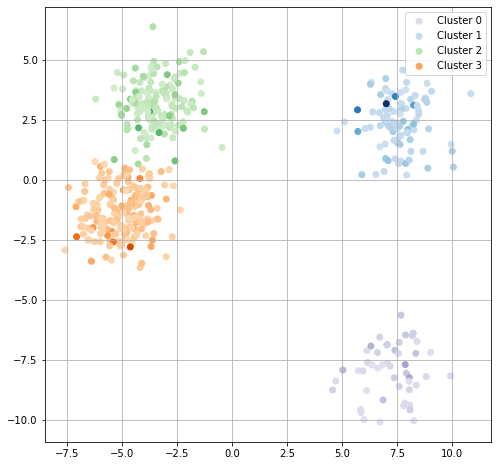

In [8]:
weight_vals = 0.2 + 0.8*(weights - weights.min())/(weights.max() - weights.min())


plt.figure(figsize=(8, 8))

for k in range(4):
    k_objs = objects[objects_clusters == k]
    x = k_objs[:, 0]
    y = k_objs[:, 1]
    k_cols = weight_vals[objects_clusters == k]
    k_cols = [clusters_colors[k](i) for i in k_cols]
    
    plt.scatter(x, y, c=k_cols, label='Cluster '+str(k))
    
plt.grid(True)
plt.legend()
plt.show()

In [9]:
objects_df = pd.DataFrame(objects, columns=['x', 'y'])
objects_df['weight'] = weights
objects_df['cluster'] = objects_clusters
objects_df = shuffle(objects_df)
objects_df.head(10)

,x,y,weight,cluster
155,-1.817920,3.272864,19,2
168,-3.882462,1.735035,8,2
198,-3.806913,3.420828,5,2
477,-4.702000,-1.610650,3,3
135,7.944321,4.061544,11,1
116,8.273029,2.083415,10,1
158,-3.686452,4.714381,3,2
160,-4.807324,2.972172,35,2
374,-2.678972,-0.257781,4,3
474,-4.117216,-3.483093,20,3


In [10]:
objects_df.to_csv('data/objects.csv', index=False)

# Calculate distances

In [11]:
vectors = objects_df[['x', 'y']].values
matrix = np.ones([vectors.shape[0], vectors.shape[0], vectors.shape[1]]) * vectors.reshape([1, vectors.shape[0], vectors.shape[1]])
distances = np.linalg.norm(matrix - matrix.transpose([1, 0, 2]), axis=2)

In [12]:
assert distances.shape == (len(objects_df), len(objects_df))
assert (distances == distances.transpose()).all()

In [13]:
pd.DataFrame(distances).to_csv('data/distances.csv', index=False, header=False)